**Algebra liniowa**

*Algebra liniowa stanowi dział matematyki obejmujący [przestrzenie wektorowe](https://pl.wikipedia.org/wiki/Przestrze%C5%84_liniowa) i przekształcenia liniowe pomiędzy przestrzeniami wektorowymi, takie jak obracanie kształtu, zmianę jego skali, operacje translacji (tj. przesuwania) itd.*

*Uczenie maszynowe w znacznym stopniu wykorzystuje pojęcia z zakresu algebry liniowej, dlatego niezbędna jest znajomość definicji wektorów i macierzy, jakie operacje można na nich wykonywać oraz w jaki sposób okazują się one przydatne.*

Zanim rozpoczniemy, upewnijmy się, że ten notatnik będzie działał w środowiskach Python 2 i Python 3:

In [1]:
from __future__ import division, print_function, unicode_literals

# Wektory
## Definicja
Wektor jest wielkością definiowaną przez wartość (moduł) i kierunek. Na przykład prędkość rakiety stanowi trójwymiarowy wektor: jego wartością jest szybkość rakiety, a kierunek - do góry (oby). Możemy przedstawiać wektor w postaci tablicy liczb zwanych *skalarami*. Każdy skalar określa moduł wektora dla oddzielnego wymiaru.

Załóżmy, na przykład, że rakieta leci niemal prosto do góry: jej szybkość pionowa wynosi 5 000 m/s, ale kieruje się także nieznacznie na wschód z szybkością 10 m/s i na północ z szybkością 50 m/s. Prędkość rakiety możemy przedstawić w postaci następującego wektora:

**prędkość** $= \begin{pmatrix}
10 \\
50 \\
5000 \\
\end{pmatrix}$

Uwaga: zgodnie z konwencją wektory są zazwyczaj przedstawiane w formie kolumn. Ponadto ich nazwy rozpoczynają się z małej lotery w celu odróżnienia ich od macierzy (których omówieniem zajmiemy się w dalszej części notatnika) i z pogrubieniem (jeśli istnieje taka możliwość), co służy ich odróżnieniu od zwykłych wartości skalarnych, np. ${metry\_na\_sekundę} = 5026$.

Zbiór N liczb może również symbolizować współrzędne punktu w N-wymiarowej przestrzeni, zatem dość często spotykamy wektory będące pojedynczymi punktami, a nie strzałkami. Wektor jednoelementowy może mieć postać strzałki lub punktu na osi, wektor dwuelementowy możemy przestawić jako strzałkę lub punkt na płaszczyźnie, wektor trójelementowy stanowi punkt lub strzałkę w przestrzeni, natomiast wektor N-elementowy wyrażamy jako punkt lub strzałkę w N-wymiarowej przestrzeni... większość ludzi ma spore problemy z wyobrażeniem sobie tego ostatniego.


##  Funkcje
Wektory pełnią wiele funkcji w dziedzinie uczenia maszynowego; przede wszystkim służą do reprezentowania obserwacji i prognoz. Powiedzmy, że stworzyliśmy system uczenia maszynowego klasyfikujące filmy w trzech kategoriach (dobre, spam, przynęty) na podstawie posiadanych przez nas informacji na ich temat. Każdy filmik byłby opisywany przez wektor określający naszą wiedzę na jego temat, np:

**filmik** $= \begin{pmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{pmatrix}$

Wektor ten mógłby oznaczać film trwający 10,5 minuty, ale tylko 5,2% widzów wytrwałoby dłużej niż minutę podczas jego oglądania, średnio uzyskuje 3,25 odsłon dziennie i został siedmiokrotnie oznaczony jako spam. Jak widać, każda oś może oznaczać coś zupełnie innego.

Na podstawie tego wektora model uczenia maszynowego mógłby oszacować, że na 80% filmik ten może być spamem, dać 18% prawdpodobieństwa, że jest przynętą, a tylko mieć 2% pewności, że stanowi on dobry filmik. Wynik ten mógłby być reprezentowany w postaci poniższego wektora:

**prawd. przynależności do klas** $= \begin{pmatrix}
0.80 \\
0.18 \\
0.02
\end{pmatrix}$

## Wektory w środowisku Python
W środowisku Python wektor może być przedstawiany na wiele sposobów, z których najprostszym jest standardowa lista wartości liczbowych:

In [2]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Będziemy wykonywać wiele obliczeń naukowych, dlatego znacznie wygodniej będzie nam korzystać z obiektu `ndarray` stanowiącego część modułu NumPy - zawiera on także wiele przydatnych i zoptymalizowanych implementacji podstawowych operacji na wektorach (więcej informacji na temat tego modułu znajdziesz w [samouczku NumPy](narzędzia_numpy.ipynb)). Na przykład:

In [3]:
import numpy as np
video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

Rozmiar wektora uzyskamy za pomocą atrybutu `size`:

In [4]:
video.size

4

Element $i$-ty wektora $\textbf{v}$ zapisujemy jako $\textbf{v}_i$.

Zwróć uwagę, że w matematyce indeksy zazwyczaj zaczynają się od liczby 1, natomiast w programowaniu - od zera. Zatem jeśli chcemy uzyskać w sposób programistyczny dostęp do elementu $\textbf{video}_3$, napisalibyśmy:

In [5]:
video[2]  # Trzeci element

3.25

## Wykresy wektorów
Do rysowania wykresów wektorów skorzystamy z modułu matplotlib, zacznijmy więc o jego importowania (szczegóły dotyczące modułu matplotlib znajdziesz w [samouczku matplotlib](narzędzia_matplotlib.ipynb)):

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

### Dwuwymiarowe wektory
Stwórzmy dwa bardzo proste wektory dwuwymiarowe:

In [7]:
u = np.array([2, 5])
v = np.array([3, 1])

Obydwa wektory są dwuelementowe, zatem z łatwością możemy je przedstawić na dwuwymiarowym wykresie, na przykład jako punkty:

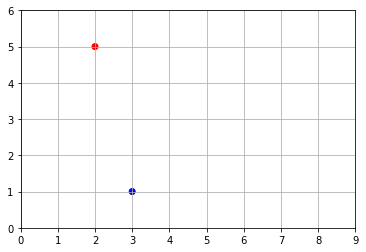

In [8]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Możemy je również wyświetlić w postaci strzałek. Stwórzmy niewielką funkcję wyświetlającą eleganckie strzałki:

In [9]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Narysujmy teraz wektory $\textbf{u}$ i $\textbf{v}$ jako strzałki:

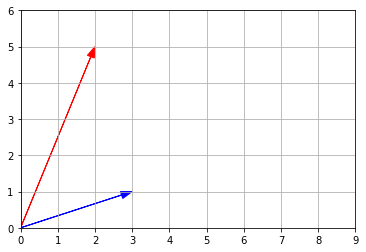

In [10]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Trójwymiarowe wektory
Proces rysowania wektorów trójwymiarowych również nie jest zbyt skomplikowany. Stwórzmy najpierw dwa trójwymiarowe wektory:

In [11]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Wygenerujmy ich wykres za pomocą klasy `Axes3D`:

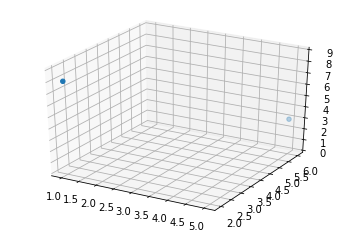

In [14]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Trudno powiedzieć, w którym miejscu przestrzeni każdy z tych wektorów się znajduje, dlatego dodamy do nich linie pionowe. Napiszmy niewielką funkcję dodającą taką linię do każdego trójwymiarowego wektora:

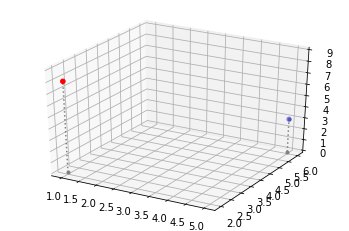

In [15]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norma
Norma wektora $\textbf{u}$, zapisywana jako $\left \Vert \textbf{u} \right \|$, stanowi miarę długości (tzn. modułu) wektora $\textbf{u}$. Istnieje wiele różnych norm, najczęściej jednak stosowaną (i opisaną w tym notatniku) jest norma euklidesowa, definiowana jako:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Możemy ją z łatwością zaimplementować w środowisku Python, pamiętając że $\sqrt x = x^{\frac{1}{2}}$

In [16]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

|| [2 5] || =


5.385164807134504

Jednak znacznie skuteczniejsze jest korzystanie z funkcji `norm` dostępnej w module `linalg` (ang. **Lin**ear **Alg**ebra - algebra liniowa):

In [17]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

Narysujmy niewielki wykres potwierdzający, że długość wektora $\textbf{v}$ rzeczywiście wynosi $\approx5.4$:

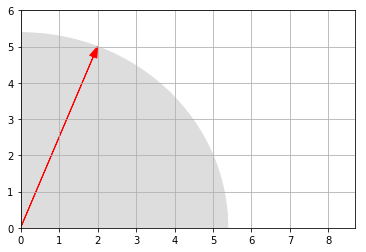

In [18]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

Wszystko się zgadza!

## Dodawanie
Możemy dodawać wektory o takim samym rozmiarze. Dodawane są ich *współrzędne*:

In [19]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Zobaczmy, jak wygląda dodawanie wektorów na układzie współrzędnych:

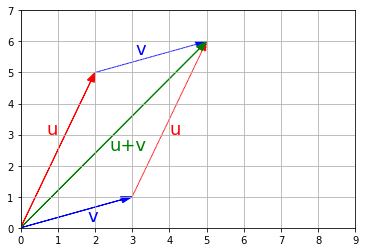

In [20]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Dodawanie wektorów jest **przemienne**, co oznacza, że $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. Widzimy to na powyższym wykresie: podążanie za wektorem $\textbf{u}$ *a następnie* za wektorem $\textbf{v}$ prowadzi do tego samego punktu, jak w przypadku podążania najpierw za wektorem $\textbf{v}$ *a następnie* za wektorem $\textbf{u}$.

Dodawanie wektorów jest również **łączne**, czyli $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

Jeżeli masz zdefiniowany jakiś kształt za pomocą punktów (wektorów) i dodasz do tych wszystkich punktów wektor $\textbf{v}$, to cały kształt zostanie przesunięty o ten wektor $\textbf{v}$. Jest to tak zwana [translacja geometryczna](https://www.medianauka.pl/translacja):

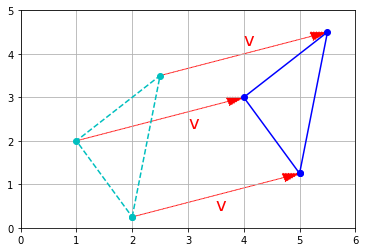

In [21]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()
plt.show()

Natomiast odejmowanie wektora przypomina dodawanie wektora o przeciwnym zwrocie.

## Mnożenie przez skalar
Wektory możemy mnożyć przez wartości skalarne. Wszystkie elementy wektora są mnożone przez ten skalar, na przykład:

In [22]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

W ujęciu graficznym mnożenie przez wartość skalarną powodue zmianę skali figury geometrycznej, stąd nazwa *skalar*. Odległość od początku układu współrzędnych (punktu, w którym wszystkie współrzędne są równe 0) zostaje również przemnożona przez ten skalar. Na przykład przeskalujmy nasz trójkąt przez wartość `k = 2.5`:

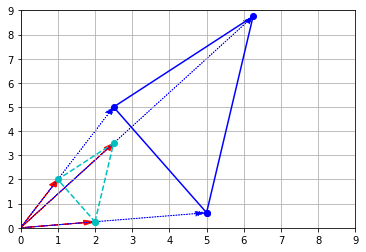

In [24]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(t1c, color="b", linestyle=":")
plot_vector2d(t2c, color="b", linestyle=":")
plot_vector2d(t3c, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()

Jak można się było domyślić, dzielenie wektora przez skalar oznacza pomnożenie tego wektora przez odwrotność wartości skalarnej:

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Mnożenie przez skalar jest **przemienne**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

Jest on również **łączne**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Okazuje się ono również **rozdzielne** względem dodawania wektorów: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Wektory zerowe, jednostkowe i znormalizowane
* **Wektor zerowy** jest wypełniony zerami.
* Norma **wektora jednostkowego** jest równa 1.
* **Wektor znormalizowany** wektora niezerowego $\textbf{u}$, zapisywany jako $\hat{\textbf{u}}$, jest wektorem jednostkowym skierowanym w tę samą stronę, co wektor $\textbf{u}$. Jest on równy: $\hat{\textbf{u}} = \dfrac{\textbf{u}}{\left \Vert \textbf{u} \right \|}$



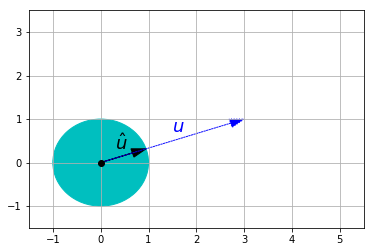

In [25]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Iloczyn skalarny
### Definicja
Iloczyn skalarny (zwany także *iloczynem wewnętrznym* w kontekście przestrzeni euklidesowej) dwóch wektorów $\textbf{u}$ i $\textbf{v}$ jest bardzo przydatną operacją wykorzystywaną dość często w algebrze liniowej. Zapisujemy go w postaci $\textbf{u} \cdot \textbf{v}$ lub, czasami, $⟨\textbf{u}|\textbf{v}⟩$ albo $(\textbf{u}|\textbf{v})$ i definiujemy go następująco:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

gdzie $\theta$ stanowi kąt pomiędzy wektorami $\textbf{u}$ i $\textbf{v}$.

Istnieje jeszcze inny sposób obliczania iloczynu skalarnego:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### W środowisku Python
Iloczyn skalarny jest bardzo prosty do zaimplementowania:

In [26]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

Jednak *znacznie* wydajniejsza implementacja jest dostępna w module NumPy za pomocą funkcji `dot`:

In [27]:
np.dot(u,v)

11

Powyższej funkcji jest równoważna metoda `dot` obiektu `ndarray`:

In [28]:
u.dot(v)

11

**Ostrzeżenie**: operator `*` wykonuje mnożenie *po współrzędnych*, *NIE* iloczyn skalarny:

In [29]:
print("  ",u)
print("* ",v, "(to NIE jest iloczyn skalarny)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (to NIE jest iloczyn skalarny)
----------


array([6, 5])

### Podstawowe własności
* Iloczyn skalarny jest **przemienny**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* Iloczyn skalarny jest definiowany wyłącznie pomiędzy dwoma wektorami, a nie pomiędzy wektorem a wartością skalarną. Oznacza to, że nie możemy łączyć iloczynów skalarnych: na przykład wyrażenie $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ nie jest zdefiniowane, ponieważ wynik działania $\textbf{u} \cdot \textbf{v}$ jest skalarem, a $\textbf{w}$ jest wektorem.
* Oznacza to również, że iloczyn skalarny **NIE jest łączny**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$, gdyż operacje po obydwu stronach równania nie są zdefiniowane.
* Jednak iloczyn skalarny **jest łączny względem mnożenia przez skalar**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Iloczyn skalarny jest również **rozdzielny** względem dodawania wektorów: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Obliczanie kąta pomiędzy wektorami
Jednym z wielu zastosowań iloczynu skalarnego jest obliczanie kąta pomiędzy dwoma niezerowymi wektorami. Za pomocą definicji iloczynu skalarnego możemy wyznaczyć następujący wzór:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Zwróć uwagę, że jeśli $\textbf{u} \cdot \textbf{v} = 0$, to $\theta = \dfrac{π}{2}$. Innymi słowy, jeśli iloczyn skalarny dwóch niezerowych wektorów jest równy 0, to znaczy, że są one prostopadłe względem siebie.

Skorzystajmy z tego wzoru do obliczenia kąta pomiędzy wektorami $\textbf{u}$ i $\textbf{v}$ (w radianach):

In [30]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(np.clip(cos_theta, -1, 1))

theta = vector_angle(u, v)
print("Kąt =", theta, "radianów")
print("    =", theta * 180 / np.pi, "stopni")

Kąt = 0.8685393952858895 radianów
    = 49.76364169072618 stopni


Uwaga: z powodu niewielkich błędów zmiennoprzecinkowych wartość `cos_theta` może nieznacznie wykraczać poza przedział $[-1, 1]$, przez co operacja `arccos` mogłaby kończyć się niepowodzeniem. Z tego powodu obcięliśmy wartość we wspomnianym zakresie za pomocą funkcji `clip`.

### Rzutowanie punktu na oś
Iloczyn skalarny jest również używany do rzutowania punktów na oś. Rzutowanie wektora $\textbf{v}$ na oś $\textbf{u}$ jest przeprowadzane za pomocą następującego równania:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Co jest równoważne wzorowi:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$


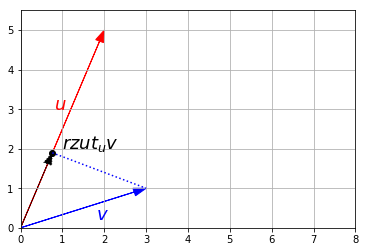

In [31]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$rzut_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.grid()
plt.show()

# Macierze
Macierzą nazywamy prostokątną tablicę przechowującą skalary (tj. dowolną wartość: całkowitą, rzeczywistą lub zespoloną) zorganizowaną w rzędy i kolumny, na przykład:

\begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}

Możemy również traktować macierz jako listę wektorów: powyższa macierz zawiera 2 poziome wektory trójwymiarowe lub 3 pionowe wektory dwuwymiarowe.

Macierze stanowią bardzo wygodny i wydajny sposób jednoczesnego wykonywania operacji na wielu wektorach. Przekonamy się także, że świetnie nadają się one do przeprowadzania przekształceń liniowych, takich jak obroty, translacje czy skalowanie.

## Macierze w środowisku Python
Macierz może być przedstawiana na różne sposoby w środowisku Python. Najprostszym z nich jest po prostu lista zawierająca listy:

In [32]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

Znacznie skuteczniejsze okazuje się używanie biblioteki NumPy zawierającej zoptymalizowane implementacje wielu operacji macierzowych:

In [33]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

Zgodnie z konwencją nazwy macierzy są zazwyczaj zapisywane dużą literą, np. $A$.

Przyjmijmy w pozostałej części samouczka, że będziemy używać macierzy mających postać tablic NumPy (typ `ndarray`).

## Rozmiar
Rozmiar macierzy definiujemy za pomocą liczby rzędów i kolumn. Zapisujemy to jako $rows \times columns$. Na przykład macierz $A$ z powyższego przykładu ma rozmiar $2 \times 3$: 2 rzędy, 3 kolumny. Uwaga: macierz $3 \times 2$ zawiera 3 rzędy i dwie kolumny.

Rozmiar macierzy w module NumPy uzyskujemy następująco:

In [34]:
A.shape

(2, 3)

**Ostrzeżenie**: atrybut `size` określa liczbę elementów w obiekcie `ndarray`, a nie rozmiar macierzy:

In [35]:
A.size

6

## Indeksowanie elementów
Wartość umieszczona w $i$-tym rzędzie i $j$-tej kolumnie macierzy $X$ jest czasami zapisywana jako $X_{i,j}$ lub $X_{ij}$, nie istnieje jednak standardowa notacja, dlatego niektórzy wolą jawnie nazywać poszczególne elementy, na przykład: "*niech $X = (x_{i,j})_{1 ≤ i ≤ m, 1 ≤ j ≤ n}$*". Oznacza to, że macierz $X$ jest równa:

$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

Jednak w tym notatniku będę stosował notację $X_{i,j}$, gdyż całkiem nieźle pasuje ona do notacji modułu NumPy. Zwróć uwagę, że w ujęciu matematycznym indeksy zazwyczaj rozpoczynają się od liczby 1, natomiast w kontekście programistycznym częściej spotykana jest liczba 0. Zatem w celu uzyskania dostępu do elementu $A_{2,3}$ w sposób programistyczny, musimy skorzystać z następującego zapisu:

In [36]:
A[1,2]  # drugi rząd, trzecia kolumna

60

Wektor w $i$-tym rzędzie bywa zapisywany jako $M_i$ lub $M_{i,*}$, ale również w tym przypadku nie istnieje jednolita konwencja, dlatego często jawnie określane są nazwy własne takich wektorów, na przykład: "*niech **x**$_{i}$ będzie $i$-tym wektorem rzędowym macierzy $X$*". Z powodu wyjaśnionego powyżej będziemy korzystać z zapisu $M_{i,*}$. Przykładowo w celu uzyskania dostępu do wektora $A_{2,*}$ (tj. wektora znajdującego się w drugim rzędzie macierzy $A$):

In [37]:
A[1, :]  # wektor w drugim rzędzie (jako jednowymiarowa tablica)

array([40, 50, 60])

W analogiczny sposób $j$-ty wektor kolumnowy bywa czasami zapisywany jako $M^j$ lub $M_{*,j}$, przy czym, tradycyjnie, również tutaj nie ustalony standard nazewnictwa. Skorzystamy z notacji $M_{*,j}$. Na przykład aby uzyskać dostęp do wektora $A_{*,3}$ (tj. trzeciego wektora kolumnowego w macierzy $A$):

In [38]:
A[:, 2]  # trzeci wektor kolumnowy (jako jednowymiarowa tablica)

array([30, 60])

Zwróć uwagę, że w wyniku uzyskujemy w rzeczywistości jednowymiarową tablicę NumPy: nie istnieje coś takiego, jak *pionowa* lub *pozioma* tablica. Jeśli chcesz, żeby wektor rzędowy był rzeczywiście przedstawiany jako macierz jednorzędowa (tzn. dwuwymiarowa tablica NumPy), a wektor kolumnowy jako macierz jednokolumnowa, to musisz użyć symbolu wycinka zamiast liczby stałoprzecinkowej podczas uzyskiwania dostępu do rzędu lub kolumny, na przykład:

In [39]:
A[1:2, :]  # drugi i trzeci (wykluczony) rząd: zwraca drugi rząd jako macierz jednorzędową

array([[40, 50, 60]])

In [40]:
A[:, 2:3]  # trzecia i czwarta (wykluczona) kolumna: zwraca trzecią kolumnę jako jednokolumnową macierz

array([[30],
       [60]])

## Macierze kwadratowe, trójkątne, diagonalne i jednostkowe 
**Macierzą kwadratową** nazywamy macierz mającą taką samą liczbę rzędów i kolumn, na przykład $3 \times 3$:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

Specyficzną odmianą macierzy kwadratowej jest **górna macierz trójkątna**, gdzie wszystkie elementy *poniżej* głównej przekątnej (od lewego górnego do prawego dolnego elementu) są zerowe, na przykład:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

W podobny sposób **dolna macierz trójkątna** jest macierzą kwadratową, w której wszystkie elementy *powyżej* głównej przekątnej są równe 0, na przykład:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

**Macierz trójkątna** to po prostu jedna z dwóch wymienionych wyżej macierzy (górna lub dolna).

Macierz będąca zarówno górną, jak i dolną macierzą trójkątną jest nazywana **macierzą diagonalną**, na przykład:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

Możemy stworzyć macierz diagonalną za pomocą funkcji `diag`:

In [41]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

Jeśli przekażemy macierz do funkcji `diag`, z radością zostaną wypisane elementy znajdujące się na głównej przekątnej:

In [42]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Z kolei **macierz jednostkowa** o rozmiarze $n$, zapisywana jako $I_n$, stanowi macierz diagonalną o rozmiarze $n \times n$, której główna przekątna jest wypełniona jedynkami; przykładem może być macierz $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Funkcja `eye` zwraca macierz jednostkową o wyznaczonym przez nas rozmiarze:

In [43]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Macierz jednostkowa często jest oznaczana symbolem $I$ (zamiast $I_n$), gdy jej rozmiar jasno wynika z kontekstu. Nazywamy ją również macierzą *tożsamościową*, ponieważ przemnożenie innej macierzy przez nią nie powoduje żadnych zmian w tej drugiej macierzy, o czym przekonamy się już niebawem.

## Dodawanie macierzy
Jeśli dwie macierze $Q$ i $R$ mają taki sam rozmiar $m \times n$, możemy je dodawać. Operacja dodawania jest wykonywana *po współrzędnych*: w wyniku otrzymujemy macierz $S$ wymiaru $m \times n$, gdzie każdy element stanowi sumę elementów znajdujących się w obydwu macierzach na tej samej pozycji: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$

Stwórzmy, na przykład, macierz $B$ o rozmiarze $2 \times 3$ i obliczmy sumę $A + B$:

In [44]:
B = np.array([[1,2,3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [46]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**Dodawanie jest *przemienne***, co oznacza, że $A + B = B + A$:

In [47]:
B + A

array([[11, 22, 33],
       [44, 55, 66]])

**Jest ono również *łączne***, czyli $A + (B + C) = (A + B) + C$:

In [48]:
C = np.array([[100,200,300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [49]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

## Mnożenie przez skalar
Macierz $M$ może być pomnożona przez skalar $\lambda$. Wynik zapisujemy wyrażeniem $\lambda M$ oznaczającym macierz o takim samym rozmiarze jak $M$, w której wszystkie elementy zostały przemnożone przez wartość $\lambda$:

$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$

Możemy to zapisać zwięźlej:

$(\lambda M)_{i,j} = \lambda (M)_{i,j}$

W module NumPy wystarczy użyć operatora `*`, aby pomnożyć macierz przez skalar. Przykładowo:

In [50]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Skalar może również znajdować się po prawej stronie macierzy i otrzymamy ten sam wynik: $M \lambda = \lambda M$. Na przykład:

In [51]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Z tego wynika, że mnożenie macierzy przez skalar jest **przemienne**.

Jest ono również **łączne**, co oznacza, że $\alpha (\beta M) = (\alpha \times \beta) M$, gdzie $\alpha$ i $\beta$ są wartościami skalarnymi. Przykład poniżej:

In [52]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [53]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Jest ono także **rozdzielne wobec dodawania** macierzy, czyli $\lambda (Q + R) = \lambda Q + \lambda R$:

In [54]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [55]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Iloczyn macierzowy
Jak na razie operacje przeprowadzane na macierzach były dość intuicyjne. Sytuacja nieco komplikuje się w przypadku mnożenia macierzy.

Możemy pomnożyć macierz $Q$ o rozmiarze $m \times n$ przez macierz $R$ o rozmiarze $n \times q$. Zapisujemy to po prostu jako $QR$, bez żadnych operatorów. Wynikowa macierz $P$ ma rozmiar $m \times q$, a każdy jej element stanowi sumę iloczynów:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

Element znajdujący się na pozycji $i,j$ w macierzy wynikowej stanowi sumę iloczynów elementów znajdujących się w rzędzie $i$ macierzy $Q$ i elementów znajdujących się w kolumnie $j$ macierzy $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

Możesz zauważyć, że każdy element $P_{i,j}$ stanowi iloczyn skalarny wektora rzędowego $Q_{i,*}$ i wektora kolumnowego $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

Zatem możemy zapisać macierz $P$ w zwięźlejszy sposób:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Pomnóżmy dwie macierze w środowisku NumPy za pomocą metody `dot` obiektu `ndarray`:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [56]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = A.dot(D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Upewnijmy się, że wynik ten jest prawidłowy, przyglądając się po kolei każdemu elementowi. Weźmy, na przykład, element $E_{2,3}$: musimy pomnożyć elementy znajdujące się w drugim rzędzie macierzy $A$ przez elementy znajdujące się w trzeciej kolumnie macierzy $D$, po czym je zsumować otrzymane iloczyny:

In [57]:
40*5 + 50*17 + 60*31

2910

In [58]:
E[1,2]  # drugi rząd, trzecia kolumna

2910

Wszystko w porządku! Możesz sprawdzić pozostałe elementy dopóki nie oswoisz się z tym algorytmem.

Przemnożyliśmy macierz $2 \times 3$ przez macierz $3 \times 4$, dzięki czemu otrzymujemy macierz $2 \times 4$. Liczba kolumn pierwszej macierzy musi być taka sama jak liczba wierszy tworzących drugą macierz.Jeśli spróbujemy pomnożyć $D$ przez $A$, pojawi się komunikat o błędzie, gdyż macierz D ma cztery kolumny, a macierz A - dwa rzędy:

In [59]:
try:
    D.dot(A)
except ValueError as e:
    print("Błąd wartości:", e)

Błąd wartości: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)


Wynika z tego prosty wniosek, że **mnożenie macierzowe *NIE* jest przemienne**: zasadniczo $QR ≠ RQ$.

W rzeczywistości *obydwie* operacje $QR$ i $RQ$ są zdefiniowane jedynie wtedy, gdy macierz $Q$ ma rozmiar $m \times n$, a macierz $R$ - $n \times m$. Spójrzmy na przykład, w którym obydwie operacje *są* zdefiniowane; pokażemy jednocześnie, że (zazwyczaj) *NIE* są one sobie równe:

In [60]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A.dot(F)

array([[400, 130],
       [940, 310]])

In [61]:
F.dot(A)

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

Z drugiej strony **mnożenie macierzowe *jest* łączne**, co oznacza, że $Q(RS) = (QR)S$. Zilustrujemy to na przykładzie nowej macierzy $G$ o rozmiarze $4 \times 5$:

In [67]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
A.dot(D).dot(G)     # (AD)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [68]:
A.dot(D.dot(G))     # A(DG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

Operacja ta jest również ***rozłączna* względem dodawania** macierzy, czyli $(Q + R)S = QS + RS$. Na przykład:

In [69]:
(A + B).dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [70]:
A.dot(D) + B.dot(D)

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

Iloczyn macierzy $M$ przez macierz jednostkową (o odpowiednim rozmiarze) daje w wyniku taką samą macierz $M$. W bardziej formalnym ujęciu, jeśli macierz $M$ ma rozmiar $m \times n$ to:

$M I_n = I_m M = M$

Możemy to zapisać zwięźlej (gdyż rozmiar macierzy jednostkowej jest jednoznacznie definiowany w zależności od kontekstu):

$MI = IM = M$

Na przykład:

In [71]:
A.dot(np.eye(3))

array([[10., 20., 30.],
       [40., 50., 60.]])

In [72]:
np.eye(2).dot(A)

array([[10., 20., 30.],
       [40., 50., 60.]])

**Ostrzeżenie**: Operator `*` w module NumPy przeprowadza operację mnożenia po współrzędnych, a *NIE* iloczyn macierzowy:

In [73]:
A * B   # to NIE jest iloczyn macierzowy

array([[ 10,  40,  90],
       [160, 250, 360]])

**Operator wrostkowy @**

W środowisku Python 3.5 [wprowadzono](https://docs.python.org/3/whatsnew/3.5.html#pep-465-a-dedicated-infix-operator-for-matrix-multiplication) operator wrostkowy `@` dla mnożenia macierzy, a jego obsługa została dodana w module NumPy 1.10. Jeśli korzystasz z wersji Python 3.5+ i NumPy 1.10+, możesz użyć zapisu `A @ D` zamiast `A.dot(D)`, co znacznie zwiększy czytelność kodu (ale zmniejszy jego przenośność). Operator ten działa również dla iloczynów wektorowych.

In [75]:
import sys
print("Wersja środowiska Python: {}.{}.{}".format(*sys.version_info))
print("Wersja modułu Numpy:", np.version.version)

# Usuń symbol komentarza z poniższego wiersza, jeżeli korzystasz z wersji ≥3.5 środowiska Python
# i ≥1.10 biblioteki NumPy:

A @ D

Wersja środowiska Python: 3.7.1
Wersja modułu Numpy: 1.16.2


array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Uwaga: operacja `Q @ R` jest w rzeczywistości równoważna operacji `Q.__matmul__(R)`, która w module NumPy przyjmuje postać funkcji `np.matmul(Q, R)`, a nie `Q.dot(R)`. Główna różnica polega na tym, że operacja `matmul`, w przeciwieństwie do operacji `dot`, nie obsługuje mnożenia przez skalary, zatem możemy zapisać `Q.dot(3)`, co jest równoważne operacji `Q * 3`, natomiast nie możemy skorzystać z zapisu `Q @ 3` ([szczegółowe wyjaśnienie](http://stackoverflow.com/a/34142617/38626)).

## Macierz transponowana
Transpozycją macierzy $M$ nazywamy macierz zapisywaną jako $M^T$, w której $i$-ty rząd jest równy $i$-tej kolumnie macierzy $M$:

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

Innymi słowy ($A^T)_{i,j}$ = $A_{j,i}$

Oczywiście, jeśli macierz $M$ ma rozmiar $m \times n$, to jej transpozycja $M^T$ przyjmuje postać $n \times m$.

Uwaga: istnieje również kilka innych notacji, takich jak np. $M^t$, $M′$ czy ${^t}M$.

W module NumPy uzykujemy macierz transponowaną za pomocą atrybutu `T`:

In [76]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [77]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

Jak można się spodziewać, transpozycja macierzy transponowanej przywraca pierwotną macierz:

In [78]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transponowanie jest rozłączne względem dodawania macierzy, czyli $(Q + R)^T = Q^T + R^T$. Na przykład:

In [79]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [80]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Co więcej, $(Q \cdot R)^T = R^T \cdot Q^T$. Zwróć uwagę na odwrócony szyk. Przykładowo:

In [81]:
(A.dot(D)).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [82]:
D.T.dot(A.T)

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

**Macierz symetryczna** $M$ to taka macierz, która jest równa jej tranzpozycji: $M^T = M$. Zgodnie z tą definicją musi to być macierz kwadratowa, której elementy są symetryczne względem głównej przekątnej, na przykład:

\begin{bmatrix}
  17 & 22 & 27 & 49 \\
  22 & 29 & 36 & 0 \\
  27 & 36 & 45 & 2 \\
  49 & 0 & 2 & 99
\end{bmatrix}

Iloczyn macierzy przez jej transpozycję zawsze daje macierz symetryczną, na przykład:

In [83]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

## Przekształcanie tablic jednowymiarowych do postaci dwuwymiarowej w module NumPy 
Jak już wiemy, w module NumPy (w przeciwieństwie do, na przykład, środowiska Matlab), jednowymiarowość jest rzeczywiście jednowymiarowością: nie występują tu jednowymiarowe tablice pionowe ani poziome. Nie powinno nas zatem dziwić, że niczego nie zdziałamy transponując jednowymiarową tablicę:

In [84]:
u

array([2, 5])

In [85]:
u.T

array([2, 5])

Przed transponowaniem tablicy $\textbf{u}$ musimy ją przekształcić do postaci wektora rzędowego. Istnieje kilka sposobów dokonania tego:

In [86]:
u_row = np.array([u])
u_row

array([[2, 5]])

Zwróć uwagę na dodatkowe nawiasy kwadratowe: mamy do czynienia z dwuwymiarową tablicą zawierającą tylko jeden rząd (tj. macierz 1x2). Innymi słowy naprawdę mamy tutaj do czynienia z **wektorem rzędowym**.

In [87]:
u[np.newaxis, :]

array([[2, 5]])

Jest to dość zrozumiałe: chcemy uzyskać kolejną oś pionową przy jednoczesnym pozostawieniu istniejących danych w osi poziomej. 

In [88]:
u[np.newaxis]

array([[2, 5]])

To samo, co wyżej, ale nieco mniej jawne.

In [89]:
u[None]

array([[2, 5]])

To zaś najkrótsza wersja, prawdopodobnie jednak chcesz jej unikać, gdyż jest niejasna. Rozwiązanie to działa dlatego, że `np.newaxis` ma w rzeczywistości wartość `None`, zatem te dwie techniki są sobie równoważne.

No dobrze, teraz transponujmy nasz wektor rzędowy:

In [90]:
u_row.T

array([[2],
       [5]])

Świetnie! Uzyskaliśmy elegancki **wektor kolumnowy**.

Nie musimy najpierw tworzyć wektora rzędowego, a później go transponować; możliwe jest przekształcenie jednowymiarowej tablicy bezpośrednio do postaci wektora kolumnowego:

In [91]:
u[:, np.newaxis]

array([[2],
       [5]])

## Wykres macierzy
Wiemy już, że wektory mogą być reprezentowane jako punkty lub strzałki w N-wymiarowej przestrzeni. Czy istnieje dobra reprezentacja graficzna macierzy? Skoro uznajemy macierze za listy wektorów, to jej wykresem jest określona liczba punktów lub strzałek. Stwórzmy, na przykład, macierz `P` o rozmiarze $2 \times 4$ i wygenerujmy jej wykres w postaci punktów:

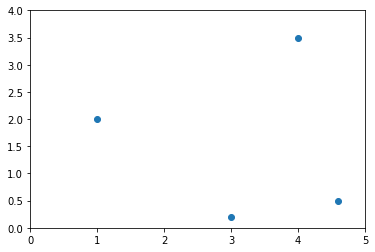

In [92]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

Oczywiście, moglibyśmy również przechowywać te same cztery wektory w postaci wektorów rzędowych, a nie kolumnowych, dzięki czemu otrzymalibyśmy macierz o rozmiarze $4 \times 2$ (czyli w istocie transpozycję macierzy $P$). Jest to tylko i wyłącznie nasz wybór.

Wektory są ułożone w określonym porządku, dlatego możemy patrzeć na macierz jako na ścieżkę i zwizualizować ją w postaci połączonych kropek:

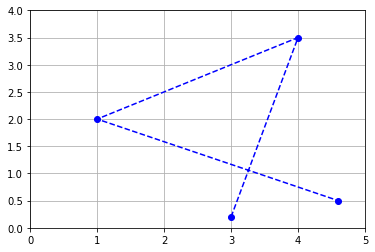

In [93]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Ewentualnie możemy przedstawić ją w postaci wielokąta: klasa `Polygon` będąca częścią modułu matplotlib spodziewa się tablicy NumPy o rozmiarze $n \times 2$, a nie tablicy $2 \times n$, zatem wystarczy jedynie przeprowadzić operację $P^T$:

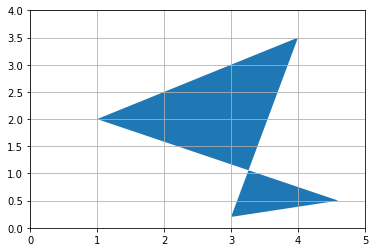

In [94]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Zastosowania geometryczne operacji macierzowych
Widzieliśmy już wcześniej, że dodawanie wektorów skutkuje procesem translacji geometrycznej, mnożenie wektorów przez skalar zmnienia skalę (powiększa lub pomniejsza, gdzie środek stanowi początek układu współrzędnych), natomiast iloczyn wektorowy skutkuje rzutowaniem wektora na inny wektor, co powoduje przeskalowanie i pomiar wynikowej współrzędnej.

Również operacje macierzowe mają bardzo użyteczne zastosowania geometryczne.

### Dodawanie = wiele translacji geometrycznych
Dodawanie dwóch macierzy jest równoznaczne sumowaniu wszystkich ich wektorów. Przykładowo stwórzmy macierz $H$ i dodajmy ją do macierzy $P$, po czym zwizualizujmy rezultat:

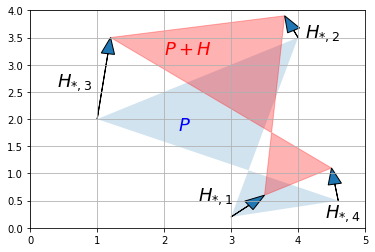

In [95]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Gdybyśmy dodali macierz wypełnioną identycznymi wektorami, to otrzymalibyśmy prostą translację geometryczną:

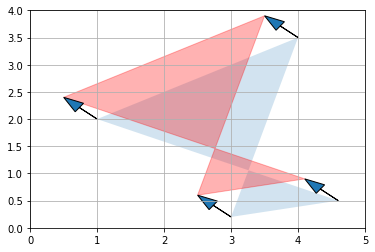

In [96]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Mimo że macierze mogą być do siebie dodawane tylko wtedy, gdy mają takie same rozmiary, moduł NumPy pozwala dodawać również wektor rzędowy lub kolumnowy do macierzy: jest to tak zwane *nadawanie* (lub *transmitowanie*) - dokładniejsze wyjaśnienie tego mechanizmu znajdziesz w [samouczku NumPy](narzędzia_numpy.ipynb). Powyższy wynik moglibyśmy uzyskać za pomocą następującej operacji:

In [97]:
P + [[-0.5], [0.4]]  # to samo, co P + H2, dzięki funkcji nadawania dostępnej w module NumPy

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Mnożenie przez skalar
Mnożenie macierzy przez wartość skalarną oznacza przemnożenie wszystkich zawartych w tej macierzy wektorów przez ten skalar, zatem nie powinno nas dziwić, że rezultatem geometrycznym tej operacji jest przeskalowanie całej figury. Przeskalujmy, na przykład, nasz wielokąt o współczynnik 60% (zmniejszamy go, środek skalowania znajduje się w początku układu współrzędnych):

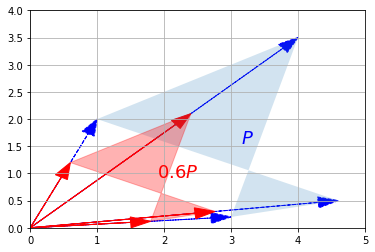

In [98]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Mnożenie macierzowe - rzutowanie na oś
Mnożenie macierzowe jest operacją trudniejszą do zwizualizowania, jednocześnie stanowi nasze najpotężniejsze narzędzie.

Zacznijmy od czegoś prostego: zdefiniujmy macierz $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$ rozmiarze $1 \times 2$. Jak widać, jest to jedynie jednostkowy wektor rzędowy.

In [99]:
U = np.array([[1, 0]])

Zobaczmy, co uzyskamy za pomocą iloczynu wektorowego $U \cdot P$:

In [100]:
U.dot(P)

array([[3. , 4. , 1. , 4.6]])

Są to współrzędne poziome wektorów znajdujących się w macierzy $P$. Innymi słowy, po prostu rzutujemy macierz $P$ na oś odciętych:

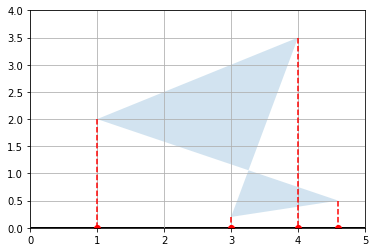

In [101]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

Możemy w rzeczywistości rzutować wynik na dowolną oś zastępując $U$ dowolnym innym wektorem jednostkowym. Na przykład, rzutujmy tę macierz na oś ułożoną pod kątem 30° w stosunku do osi odciętych:

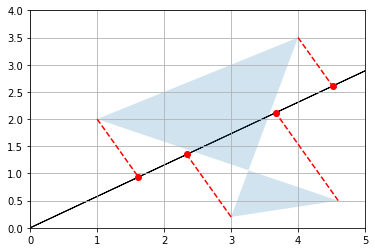

In [102]:
angle30 = 30 * np.pi / 180  # kąt w radianach
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

Dobrze! Pamiętaj, że iloczyn wektorowy wektora jednostkowego i macierzy zasadniczo powoduje rzutowanie tej macierzy na daną oś, a my otrzymujemy współrzędne wyznaczonych przez tę operację punktów na tej osi.

### Mnożenie macierzowe – rotacja
Stwórzmy teraz macierz $V$ o rozmiarze $2 \times 2$ zawierającą dwa wektory jednostkowe tworzące kąty 30° i 120° z osią odciętych:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [112]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Sprawdźmy iloczyn $VP$:

In [106]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-2.49807621, -1.71410162,  0.1339746 , -3.73371686]])

Pierwszy rząd jest równy iloczynowi $V_{1,*} P$, czyli współrzędnym rzutowania macierzy $P$ na oś 30°, co już widzieliśmy wcześniej. W drugim rzędzie widzimy wynik operacji $V_{2,*} P$, odpowiadający współrzędnym rzutowania tejże macierzy na oś 120°. Zatem mówiąc krótko uzyskaliśmy współrzędne macierzy $P$ po obróceniu osi odciętych i rzędnych o 30° (albo po obróceniu wielokąta o -30° względem początku układu współrzędnych)! Zobaczmy, jak to wygląda na wykresie:

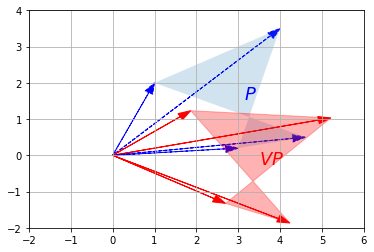

In [113]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

Macierz $V$ nazywamy **macierzą obrotu**.

### Iloczyn macierzowy – inne przekształcenia liniowe
W bardziej ogólnym ujęciu każde przekształcenie liniowe $f$ odwzorowujące n-wymiarowe wektory na m-wymiarowe wektory możemy przedstawiać za pomocą macierzy. Załóżmy, na przykład, że mamy do czynienia z trójwymiarowym wektorem $\textbf{u}$:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

a przekształcenie $f$ definiujemy jako:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

Transformacja ta odwzorowuje trójwymiarowe wektory do postaci dwuwymiarowej w sposób liniowy (tzn. otrzymywane współrzędne stanowią jedynie sumy iloczynów pierwotnych koordynatów). Możemy zapisać to przekształcenie jako macierz $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Teraz w celu obliczenia $f(\textbf{u})$ wystarczy przeprowadzić mnożenie macierzowe:

$f(\textbf{u}) = F \textbf{u}$

Jeśli mamy macierz $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, gdzie każdy element $\textbf{u}_i$ stanowi trójwymiarowy wektor kolumnowy, to operacja $FG$ spowoduje liniowe przekształcenie wszystkich wektorów  $\textbf{u}_i$ w sposób zdefiniowany w macierzy $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

Podsumowując, macierz znajdująca się po lewej stronie iloczynu wektorowego określa stosowane przekształcenie liniowe wobec wektorów znajdujących się po prawej stronie. Wiemy już, że w ten sposób możemy przeprowadzać operacje rzutowania i obracania, ale możemy w ten sposób wyznaczać dowolną inną transformację liniową. Na przykład, poniżej prezentuję przekształcenie znane jako *powinowactwo osiowe*:

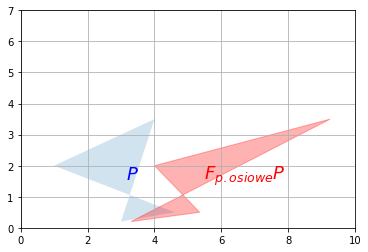

In [114]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{p. osiowe} P$",
                    axis=[0, 10, 0, 7])
plt.show()

Sprawdźmy, jak to przekształcenie wpływa na **kwadrat jednostkowy**: 

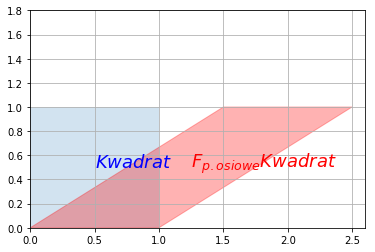

In [115]:
Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Kwadrat$", "$F_{p. osiowe} Kwadrat$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

Sprawdźmy teraz **powinowactwo ściskowe** (ang. squeeze mapping):

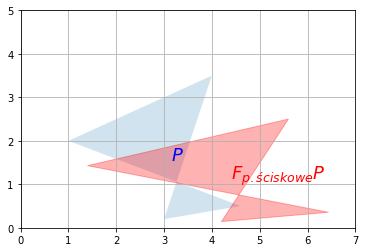

In [116]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{p. ściskowe} P$",
                    axis=[0, 7, 0, 5])
plt.show()

I jego wpływ na kwadrat jednostkowy:

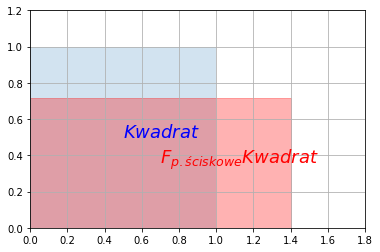

In [117]:
plot_transformation(Square, F_squeeze.dot(Square), "$Kwadrat$", "$F_{p. ściskowe} Kwadrat$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

Ostatnie przekształcenie: odbicie względem osi odciętych:

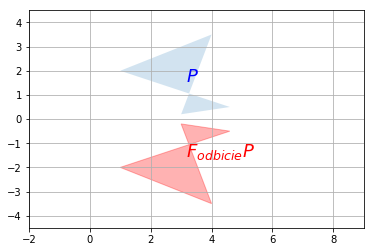

In [120]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{odbicie} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

## Macierz odwrotna
Rozumiemy już, w jaki w sposób macierz może reprezentować dowolne przekształcenie liniowe, może więc pojawić się w naszych głowach pytanie: czy istnieje macierz transformacji odwracająca efekt danej macierzy transformacji $F$? Odpowiedź brzmi: tak... czasami! Jeśli taka macierz istnieje, jest ona nazywana **macierzą odwrotną** i zapisujemy ją jako $F^{-1}$.

Na przykład, wszystkie ukazane powyżej przekształcają mają swoje transformacje odwrotne. Zaprezentuję to dla powiniwactwa osiowego:

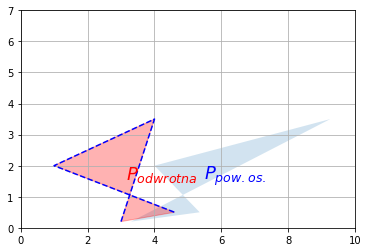

In [121]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{pow. os.}$", "$P_{odwrotna}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

Podobnie jak wcześniej wykonaliśmy powinowactwo osiowe wobec wielokąta $P$, następnie jednak przeprowadziliśmy drugą transformację wobec otrzymanej figury i *uwaga, uwaga* w ten sposób powróciliśmy do pierwotnego kształtu $P$ (upewniamy się o tym oznaczając pierwotny zarys wielokąta $P$ linią przerywaną). Drugie przekształcenie stanowi odwrotność pierwszego.

Zdefiniowaliśmy tutaj macierz odwrotną $F_{pow. os.}^{-1}$ własnoręcznie, ale moduł NumPy zawiera funkcję `inv` wykonującą tę czynność za nas, moglibyśmy zatem napisać:

In [122]:
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

Możemy odwracać wyłącznie macierze kwadratowe. Jeśli się nad tym zastanowić, ograniczenie to ma sens: gdybyśmy przeprowadzali transformację redukującą liczbę wymiarów, to część informacji zostałaby utracona i nie mielibyśmy możliwości jej odzyskania. Załóżmy, na przykład, że wykorzystujemy macierz o rozmiarze $2 \times 3$ do rzutowania trójwymiarowego na płaszczyznę. Wyglądałoby to następująco:

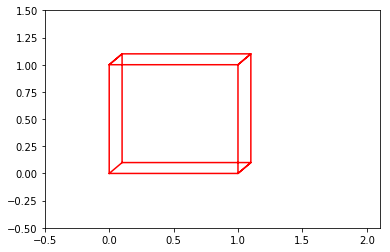

In [123]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

Patrząc na ten wykres, nie możemy jednoznacznie stwierdzić, czy patrzymy na rzut sześcianu lub wąskiego, prostopadłościennego obiektu. W wyniku rzutowania część informacji została utracona.

Nawet kwadratowe macierze transformacji mogą nie przechowywać wszystkich informacji. Przyjrzyjmy się poniższej macierzy:

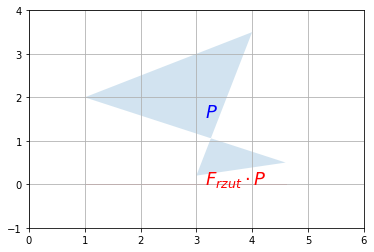

In [124]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{rzut} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Ta macierz transformacji przeprowadza rzutowanie na oś odciętych. Nasz wielokąt zostaje całkowicie "spłaszczony", przez co tracimy wszystkie informacje i nie jesteśmy w stanie odtworzyć pierwotnego wielokąta za pomocą przekształcenia liniowego. Innymi słowy, nie istnieje odwrotność macierzy $F_{project}$. Nie możemy uzyskać w tym przypadku macierzy odwrotnej, dlatego nazywamy ją **macierzą osobliwą** (lub zdegenerowaną). Na próbę stworzenia jej macierzy odwrotnej moduł NumPy zareaguje w następujący sposób:

In [106]:
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("Błąd algorytmu liniowego:", e)

Błąd algorytmu liniowego: Singular matrix


A tu mamy jeszcze jeden przykład macierzy osobliwej. Tym razem rzutujemy nasz wielokąt na oś ułożoną pod kątem 30° w stosunku do osi odciętych:

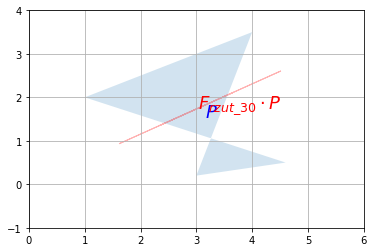

In [125]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(P, F_project_30.dot(P), "$P$", "$F_{rzut\_30} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Tym razem jednak z powodu błędów zaokrągleń zmiennoprzecinkowych modułowi NumPy udaje się obliczyć macierz odwrotną (zwróć jednak uwagę na duże wartości poszczególnych elementów):

In [126]:
LA.inv(F_project_30)

array([[ 1.20095990e+16, -2.08012357e+16],
       [-2.08012357e+16,  3.60287970e+16]])

Jak się można było spodziewać, iloczyn skalarny macierzy i jej odwrotności generuje macierz jednostkową:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

Jest to logiczne, ponieważ przeprowadzenie transformacji liniowej, a następnie wykonanie jej odwrócenie nie powoduje ostatecznie żadnych zmian.

In [127]:
F_shear.dot(LA.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

Możemy to wyrazić również jako inwersję macierzy odwrotnej $M$, co daje nam pierwotną macierz $M$:

$((M)^{-1})^{-1} = M$

In [128]:
LA.inv(LA.inv(F_shear))

array([[1. , 1.5],
       [0. , 1. ]])

Poza tym odwrotność skalowania przez współczynnik $\lambda$ oznacza, oczywiście, skalowanie przez współczynnik $\frac{1}{\lambda}$:

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

Gdy zrozumiesz geometryczną interpretacją macierzy jako przekształceń liniowych, większość z tych własności staje się dość intuicyjna.

Macierz będąca jednocześnie swoją odwrotnością to tak zwana macierz **inwolutywna**. Najprostsze przykłady stanowią macierz odbiciowa lub macierz obrotu o 180°, istnieją jednak bardziej złożone macierze inwolutywne; wyobraź sobie na przykład przekształcenie, które najpierw rzutuje na oś odciętych, następnie tworzy odbicie lustrzane wzdłuż osi rzędnych, po czym obraca wynik o 90° zgodnie z ruchem wskazówek zegara. Weź serwetkę i spróbuj wykonać tę czynność dwa razy: wrócisz do pozycji wyjściowej. Poniżej przedstawiam wspomnianą macierz inwolutywną:

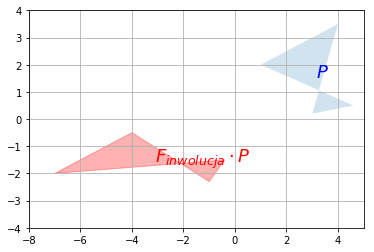

In [129]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{inwolucja} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

Jeszcze jednym rodzajem macierzy kwadratowej $H$, której odwrotność stanowi jej transpozycję, jest **macierz ortogonalna**:

$H^{-1} = H^T$

Zatem:

$H \cdot H^T = H^T \cdot H = I$

W ujęciu geometrycznym odpowiada ona przekształceniu zachowującemu odległości, czyli np. obrotom, odbiciom czy połączeniom tych transformacji, ale nie skalowaniu, powinowactwu osiowemu czy ściskowemu. Sprawdźmy, czy macierz $F_{odbicie}$ jest w istocie ortogonalna:

In [130]:
F_reflect.dot(F_reflect.T)

array([[1, 0],
       [0, 1]])

## Wyznacznik
Wyznacznikiem macierzy kwadratowej $M$, zapisywanym jako $\det(M)$ lub $\det M$ albo $|M|$, nazywamy wartość wyliczaną z jej elementów $(M_{i,j})$ za pomocą różnych równoznacznych metod. Jedną z najprostszych metod jest podejście rekurencyjne:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* gdzie $M^{(i,j)}$ jest macierzą $M$ bez rzędu $i$ i kolumny $j$.

Na przykład, obliczmy wyznacznik następującej macierzy o rozmiarze $3 \times 3$:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Za pomocą powyższej metody uzyskujemy:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Teraz musimy obliczyć wyznacznik każdej z tych macierzy o rozmiarze $2 \times 2$ (wyznaczniki te są nazywane **minorami**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

A teraz czas obliczyć ostateczny wynik:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

Aby obliczyć wyznacznik macierzy, możesz skorzystać z funkcji `det` dostępnej w module `numpy.linalg`:

In [131]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

Jednym z głównych zastosowań wyznaczników jest *wyznaczanie* odwracalności macierzy: jeżeli wartość wyznacznika jest równa 0, to macierzy *nie można* odwrócić (jest macierzą osobliwą), w przeciwnym wypadku *można* uzyskać jej macierz odwrotną.

Obliczmy, na przykład, wyznaczniki zdefiniowanych wcześniej macierzy $F_{rzut}$, $F_{rzut\_30}$ and $F_{pow. os.}$:

In [132]:
LA.det(F_project)

0.0

Zgadza się, macierz $F_{rzut}$ jest osobliwa, ale o tym już wiemy.

In [133]:
LA.det(F_project_30)

2.0816681711721642e-17

Wyznacznik ten jest podejrzanie bliski zeru: w rzeczywistości jego wartość powinna wynosić 0, ale wpływ tu mają drobne błędy zmiennoprzecinkowe. Macierz ta jest w istocie osobliwa.

In [134]:
LA.det(F_shear)

1.0

Doskonale! Jak już się wcześniej przekonaliśmy, macierz ta *może* zostać odwrócona. Wow, matematyka naprawdę działa!

Możemy również wykorzystać wyznacznik do pomiaru wpływu przekształcenia liniowego na obszary powierzchniowe: na przykład macierze rzutowania $F_{rzut}$ and $F_{rzut\_30}$ zupełnie "spłaszczają" wielokąt $P$ aż do wyzerowania jego powierzchni. Dlatego właśnie wyznaczniki tych macierzy mają wartość 0. Powinowactwo osiowe zmodyfikowało kształt wielokąta, ale nie wpłynęło na jego obszar powierzchni, dlatego wyznacznik tej macierzy jest równy 1. Możesz również spróbować obliczyć wyznacznik macierzy obrotu i także tutaj powinnaś/powinieneś otrzymać wartość 1. A co w przypadku macierzy skalowania? Sprawdźmy:

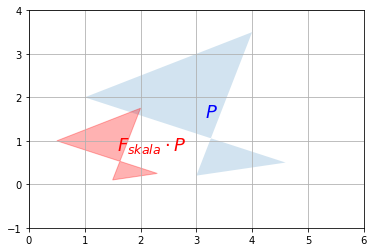

In [135]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(P, F_scale.dot(P), "$P$", "$F_{skala} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

Przeskalowaliśmy wielokąt o współczynnik 1/2 zarówno względem osi odciętych, jak i rzędnych, zatem powierzchnia wielokąta wynikowego stanowi 1/4 pierwotnej figury. Obliczmy wyznacznik macierzy skalowania i zobaczmy, co otrzymamy:

In [137]:
LA.det(F_scale)

0.25

Zgadza sie!

Wyznacznik może również mieć ujemną wartość, gdy przekształcenie skutkuje "przekręconą" wersją pierwotnego wielokąta (np. lewa rękawiczka staje się prawą). Na przykład wyznacznik macierzy `F_odbicie` ma wartość -1, ponieważ powierzchnia figury nie ulega zmianie, ale sama figura zostaje odwrócona:

In [138]:
LA.det(F_reflect)

-1.0

## Łączenie przekształceń liniowych
Możemy powiązać kilka przekształceń liniowych poprzez obliczenie wielu iloczynów skalarnych pod rząd. Gdybyśmy, na przykład, chcieli najpierw wykonać powinowactwo ściskowe, a po nim osiowe, wystarczy napisać:

In [139]:
P_squeezed_then_sheared = F_shear.dot(F_squeeze.dot(P))

Iloczyn skalarny jest łączny, dlatego możemy również zapisać:

In [140]:
P_squeezed_then_sheared = (F_shear.dot(F_squeeze)).dot(P)

Zwróć uwagę, że kolejność przekształceń stanowi odwrotność kolejności iloczynu skalarnego.

Jeśli zamierzamy przeprowadzać wielokrotnie takie połączone przekształcenia liniowe, moglibyśmy również naszą macierz złożoną zachować w następujący sposób:

In [141]:
F_squeeze_then_shear = F_shear.dot(F_squeeze)
P_squeezed_then_sheared = F_squeeze_then_shear.dot(P)

Od teraz obydwa przekształcenia będą przeprowadzane za pomocą tylko jednego iloczynu skalarnego, co prowadzi do znacznego wzrostu wydajności.

A gdybyśmy chcieli wykonać odwrotne przekształcenie naszej podwójnej transformacji? Jest dość oczywiste, że jeśli najpierw ścisnęliśmy, a później wprowadziliśmy powinowactwo osiowe, to należałoby wykonać odwrotne operacje w odwrotnej kolejności. W ujęciu matematycznym, mając dwie odwracalne (czyli nieosobliwe) macierze $Q$ i $R$:

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

A w module NumPy wyglądałoby to tak:

In [142]:
LA.inv(F_shear.dot(F_squeeze)) == LA.inv(F_squeeze).dot(LA.inv(F_shear))

array([[ True,  True],
       [ True,  True]])

## Rozkład według wartości osobliwych
Okazuje się, że dowolna macierz $M$ o rozmiarze $m \times n$ może być rozłożona na iloczyn skalarny trzech prostych macierzy: 
* macierz obrotu $U$ (macierz ortogonalna o rozmiarach $m \times m$)
* macierz skalowania i rzutowania $\Sigma$ (macierz diagonalna o rozmiarza $m \times n$)
* i jeszcze jedną macierz obrotu $V^T$ (macierz ortogonalna o rozmiarze $n \times n$)

$M = U \cdot \Sigma \cdot V^{T}$

Rozłóżmy, na przykład macierz powinowactwa osiowego:

In [143]:
U, S_diag, V_T = LA.svd(F_shear) # uwaga: w środowisku python 3 możesz przemianować S_diag na Σ_diag
U

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [144]:
S_diag

array([2. , 0.5])

Zwróć uwagę, że otrzymujemy jedynie jednowymiarową tablicę zawierającą wartości przekątnej z macierzy Σ. Aby uzyskać właściwą macierz Σ, skorzystamy z funkcji `diag`:

In [145]:
S = np.diag(S_diag)
S

array([[2. , 0. ],
       [0. , 0.5]])

Sprawdźmy teraz, czy iloczyn $U \cdot \Sigma \cdot V^T$ jest rzeczywiście równy macierzy `F_pow. os.`:

In [146]:
U.dot(np.diag(S_diag)).dot(V_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [147]:
F_shear

array([[1. , 1.5],
       [0. , 1. ]])

Zadziałało jak marzenie. Przeprowadźmy po kolei przekształcenia składowe (w odwrotnej kolejności) na kwadracie jednostkowym, aby zrozumieć, co tu się właściwie dzieje. Najpierw wykonajmy pierwszą rotację: $V^T$:

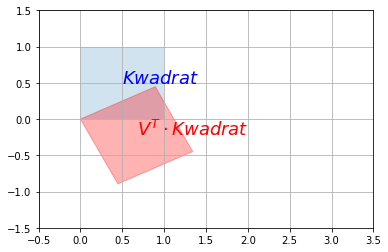

In [148]:
plot_transformation(Square, V_T.dot(Square), "$Kwadrat$", "$V^T \cdot Kwadrat$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Teraz przeskalujmy tę figurę względem osi rzędnych i odciętych za pomocą macierzy $\Sigma$:

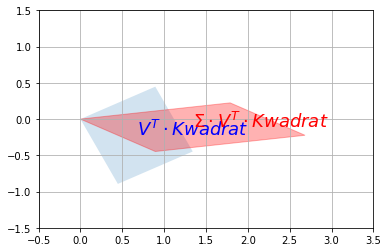

In [149]:
plot_transformation(V_T.dot(Square), S.dot(V_T).dot(Square), "$V^T \cdot Kwadrat$", "$\Sigma \cdot V^T \cdot Kwadrat$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Teraz wykonujemy drugi obrót $U$:

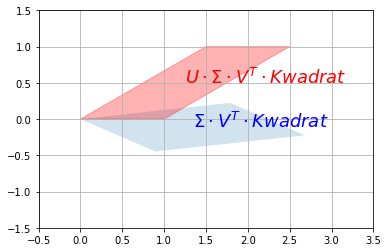

In [150]:
plot_transformation(S.dot(V_T).dot(Square), U.dot(S).dot(V_T).dot(Square),"$\Sigma \cdot V^T \cdot Kwadrat$", "$U \cdot \Sigma \cdot V^T \cdot Kwadrat$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Jak widać, w rezultacie rzeczywiście otrzymujemy powinowactwo osiowe pierwotnego kwadratu jednostkowego.

## Wektory własne i wartości własne
**Wektorem własnym** (zwanym także **wektorem charakterystycznym**) macierzy kwadratowej $M$ nazywamy wektor niezerowy niezmieniający swojego kierunku po przekształceniu liniowym zdefiniowanym przez macierz $M$. Zgodnie z bardziej formalną definicją jest to dowolny wektor $v$, który

$M \cdot v = \lambda \times v$

gdzie $\lambda$ jest wielkością skalarną zwaną **wartością własną**, powiązaną z wektorm $v$.

Na przykład każdy wektor poziomy pozostaje taki po zastosowaniu powinowactwa osiowego (co widać na powyższym wykresie), zatem jest on wektorem własnym przekształcenia $M$. Wektor pionowy zostaje nieco przechylony w prawo, zatem wektory pionowe *NIE SĄ* wektorami własnymi macierzy $M$.

Jeśli przyjrzymy się powinowactwu ściskowemu, zauważymy, że zarówno wektor poziomy, jak i pionowy nie zmieniają kierunku (chociaż ich moduł zostaje powiększony), zatem w tym przypadku wszystkie wektory poziome i pionowe są wektorami własnymi macierzy $F_{pow. ścisk.}$.

Jednak macierze obrotu w ogóle nie zawierają wektorów własnych (za wyjątkiem obrotu o 0° lub 180° - w takiej sytuacji wszystkie wektory niezerowe są wektorami własnymi).

Funkcja `eig` modułu NumPy zwraca listę jednostkowych wektorów własnych i odpowiadające im wartości własne dla dowolnej macierzy kwadratowej. Przyjrzyjmy się wektorom własnym i wartościom własnym macierzy powinowactwa ściskowego $F_{pow. ścisk.}$:

In [151]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [152]:
eigenvectors # [v0, v1, …]

array([[1., 0.],
       [0., 1.]])

Rzeczywiście, wektory poziome są rozciągnięte o współczynnik 1,4, natomiast wektory pionowe są z zmniejszone o 1/1,4=0,714… Jak na razie całkiem nieźle. Sprawdźmy macierz powinowactwa osiowego $F_{pow. os.}$:

In [153]:
eigenvalues2, eigenvectors2 = LA.eig(F_shear)
eigenvalues2 # [λ0, λ1, …]

array([1., 1.])

In [154]:
eigenvectors2 # [v0, v1, …]

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

Chwileczkę, co!? Spodziewaliśmy się tylko jednego jednostkowego wektora własnego, a nie dwóch. Drugi wektor jest niemal równy  $\begin{pmatrix}-1 \\ 0 \end{pmatrix}$, czyli znajduje się niemal w tej samej linii, co pierwszy wektor $\begin{pmatrix}1 \\ 0 \end{pmatrix}$. Wynika to z błędów zmiennoprzecinkowych. Możemy spokojnie ignorować wektory, które są (niemal) współliniowe (tzn. znajdują się w jednej linii).

## Ślad
Śladem macierzy kwadratowej $M$, (zapisywanym jako $tr(M)$) nazywamy sumę wartości znajdujących się w jej głównej przekątnej. Na przykład:

In [155]:
D = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
np.trace(D)

123

Ślad nie ma (przeważnie) prostej interpretacji geometrycznej, jednak cechuje kilka własności, dzięki którym okazuje się przydatny w wielu dziedzinach: 
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
* …

Jednak ślad ma jedną bardzo istotną interpretację geometryczną w przypadku macierzy rzutowania (takich jak np. omówiona wcześniej macierz $F_{rzut}$): odpowiada on liczbie wymiarów po rzutowaniu. Przykładowo:

In [156]:
np.trace(F_project)

1

# Co dalej?
Na tym zakończymy wprowadzenie do algebry liniowej. Zawarte tu podstawy stanowią większość wiedzy potrzebnej w dziedzinie uczenia maszynowego, jeśli jednak chcesz bardziej zgłębić tajniki wektorów i macierzy, masz wiele możliwości: [literaturę](http://visual.icse.us.edu.pl/LA/literatura.html), wykłady w serwisie [Khan Academy](https://pl.khanacademy.org/math/linear-algebra) czy nawet strony [Wikipedii](https://en.wikipedia.org/wiki/Linear_algebra). 